In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.text import *
import pyperclip

/Users/adamschiller/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
PATH = Path('data/handwriting_images/')

# EWD speech

In [234]:
src_path = PATH/'ewd'

CSV = PATH/'ewd.csv'
df = pd.read_csv(CSV)
df.tail()

,filename,text
102,EWD_103.png,Reluctantly admitting that it could perhaps\nb...
103,EWD_104.png,"Needless to say, that\nkite won't fly either. ..."
104,EWD_105.png,that very soon thereafter he makes the excitin...
105,EWD_106.png,Teaching to unsuspecting youngsters the\neffec...
106,EWD_107.png,"To my taste\nand style, that is what education..."


In [6]:
def yrange(n):
    i = 14
    while i < n:
        yield i
        i += 1
        
y = yrange(107)

100


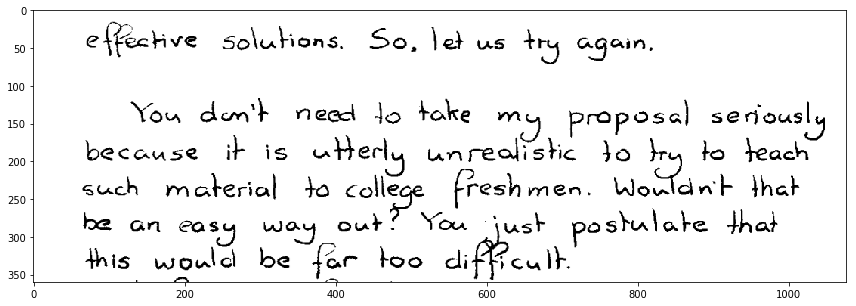

In [187]:
i = next(y)
print(i)
row = df.iloc[i]
# !printf '{row.text}' | pbcopy
pyperclip.copy(row.text)
im = Image.open(src_path/row.filename)
fig,ax = plt.subplots(figsize=(18,5))
ax.imshow(im)

In [186]:
row.text = '''effective solutions. So, let us try again.
You don't need to take my proposal seriously
because it is utterly unrealistic to try to teach
such material to college freshmen. Wouldn't that
be an easy way out? You just postulate that
this would be far too difficult.'''

In [237]:
df.to_csv(CSV, columns=['filename', 'text'], index=False)

In [235]:
text = [row.replace('—','-').replace('[','(').replace(']',')') for row in df.text.values]

In [236]:
df.text = text

# Resize

In [145]:
def resize_max(im, size=1000):
    "Resize an image so that the largest dimension is of specified size"
    r,c = im.size
    ratio = size/max(r,c)
    return im.resize((int(r*ratio), int(c*ratio)), Image.ANTIALIAS)

In [146]:
def square_max(im, top_left=False, size=None):
    '''
    Add whitespace to square an image by its largest dimension or specified size.
    Args:
        top_left: image is aligned with the top_left corner
        size: size of final squared image.  If left blank size = largest dimension
    '''
    
    r,c = im.size
    if size is not None and size > max(r,c):
        sz = size
    else:
        sz = max(r,c)
        
    new_im = Image.new('RGB', (sz, sz), color=(255,255,255))  # new white image
    
    # box logic
    if top_left:
        box = (0,0)
    else:
        if sz == r:
            box = (0,random.randint(0,sz-c)) 
        elif sz == c:
            box = (random.randint(0,sz-r),0)
        else:
            box = (random.randint(0,sz-r),random.randint(0,sz-c))
            
    new_im.paste(im, box=box)
    return new_im

In [147]:
def resize_dir(fn, src, targ=None):
    if targ is None: targ = src
    dirs = os.listdir(src)
    for item in tqdm(dirs):
        if os.path.isdir(src/item): continue     # skip if src dir
#         if os.path.isfile(targ/item): continue   # skip if file exists in targ dir
        im = Image.open(src/item)
        rsz = fn(im)
        rsz.save(targ/item)
        rsz.close()
        im.close()

In [150]:
def resize_to_square(src_dir, targ_dir, size):
    "Resize and square all images in src_dir and save in targ_dir"
    resize_dir(partial(resize_max, size=size), src_dir, targ_dir)
    resize_dir(square_max, targ_dir)

In [156]:
targ_path = PATH/'resized_downloads'
os.makedirs(targ_path, exist_ok=True)

resize_to_square(src_path, targ_path, 1000)

100%|██████████| 31/31 [00:13<00:00,  3.11it/s]


# SymSpell

In [192]:
from symspellpy.symspellpy import SymSpell, Verbosity

In [193]:
sym_spell = SymSpell()

In [194]:
sym_spell.load_dictionary(Path('data/IAM_handwriting/frequency_dictionary_en_82_765.txt'), 0, 1)

True

In [195]:
input_term = "Shus is a test letter. F hope this\nworks but I not gre it will\nmy hundusiting is not very god"
res = sym_spell.lookup_compound(input_term, 2)

In [196]:
res[0].term

'thus is a test letter of hope this works but i not gre it will my hindu siting is not very god'

# Downloaded Images

In [153]:
src_path = PATH/'downloads'
text = []

In [ ]:
fname = '31.png'
im = Image.open(src_path/fname)
fig,ax = plt.subplots(figsize=(18,8))
ax.imshow(im)

In [101]:
text = '''cate- we can not consecrate- we can not
hallow- this ground. The brave men, live-
ing and dead, who struggled here, have con-
secrated it, for above our poor power to add
or detract. The world will little note, nor
long remember what we say here, but it can
never forget what they did here. It is for us
the living, rather, to be dedicated here to
the unfinished work which they who fou-
ght here have thus far so nobly advanced.
It is rather for us to be here dedicated to
the great task remaining before us -- that
from these honored dead we take increased
devotion to that cause for which they gave
the last full measure of devotion -- that
we here highly resolve that these dead shall
not have died in vain -- that this nation,'''

df = df.append({'filename': fname, 'text': text}, ignore_index=True)

In [61]:
df = pd.DataFrame(list(zip(names, text)),  columns =['filename', 'text'])

In [103]:
df.tail()

,filename,text
26,27.png,This is because I can spell confusion with\na ...
27,28.png,"Hello reddit, I am having a very tough time de..."
28,29.png,"Hi Reddit,\nI came across this subreddit\ntoda..."
29,30.png,My Weekend\nThis weekend was awesome!\nI went ...
30,31.png,cate- we can not consecrate- we can not\nhallo...


In [256]:
CSV = PATH/'downloads.csv'
df = pd.read_csv(CSV)

In [259]:
df.to_csv(CSV, columns=['filename', 'text'], index=False)

In [257]:
text = [row.replace('—','-').replace('[','(').replace(']',')') for row in df.text.values]

In [258]:
df.text = text

# Numericalize

In [238]:
itos = pickle.load(open('data/IAM_handwriting/tmp/char_itos.pkl', 'rb'))
len(itos)

82

In [260]:
joined_labels = list(df.text)

stoi = collections.defaultdict(lambda: 6, {v:k for k,v in enumerate(itos)})
ids = np.array([np.array([stoi[letter] for letter in word] + [3]) for word in joined_labels])

# convert to strings (as labels)
str_ids = np.array([' '.join(str(l) for l in w) for w in ids]).reshape(-1,1)

In [261]:
df['char_ids'] = str_ids
df.head()

,filename,text,char_ids
0,1.png,"My mother, Janey Schultz, always\ntold her dau...",42 80 1 68 70 75 63 60 73 13 1 39 56 69 60 80 ...
1,2.png,Reading a handwritten article about hand-\nwri...,47 60 56 59 64 69 62 1 56 1 63 56 69 59 78 73 ...
2,3.png,My Teacher told me that I really did well in t...,42 80 1 49 60 56 58 63 60 73 1 75 70 67 59 1 6...
3,4.png,compare it too. Investigators searched for\ncl...,58 70 68 71 56 73 60 1 64 75 1 75 70 70 15 1 3...
4,5.png,Hello Everybody. I'd like to welcome you you t...,37 60 67 67 70 1 34 77 60 73 80 57 70 59 80 15...


In [262]:
CSV = PATH/'download_ids.csv'
df.to_csv(CSV, columns=['filename', 'char_ids'], index=False)

# Concatenate CSVs

In [263]:
a = pd.read_csv(PATH/'ewd_ids.csv')
b = pd.read_csv(PATH/'download_ids.csv')

In [264]:
new = pd.concat([a,b], ignore_index=True)
len(new)

138

In [265]:
new.to_csv(PATH/'downloaded_images.csv', index=False)

In [266]:
df = pd.read_csv(PATH/'downloaded_images.csv')